# Decision Tree

In [1]:
import pandas as pd

In [3]:
wine = pd.read_csv('datasets/winequality-red.csv', delimiter = ';')

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df = wine.copy()

In [10]:
def c(x):
    if x >=6:
        return 1
    else:
        return 0

In [12]:
df['good'] = df['quality'].apply(c)

# df['good'] = df['quality'].apply(lambda x : 1 if x>=6 else 0)

In [13]:
df['good'].unique()

array([0, 1], dtype=int64)

In [16]:
df = df.drop(['quality'], axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [19]:
df_x = df.iloc[:, :11]

In [22]:
df_y = df.iloc[:, 11]

In [24]:
df_y.value_counts()

1    855
0    744
Name: good, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 2022, shuffle = True)

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
y_train = y_train.values.reshape(-1)

In [27]:
## 학습

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [29]:
x_test_scaled = ss.transform(x_test)
y_test = y_test.values.reshape(-1)

In [31]:
y_pred = dt.predict(x_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.775

In [35]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[114,  38],
       [ 34, 134]], dtype=int64)

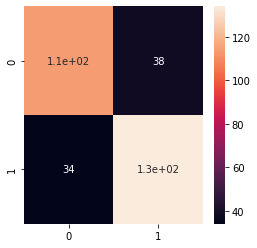

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4))
sns.heatmap(cfm, annot = True)
plt.show()

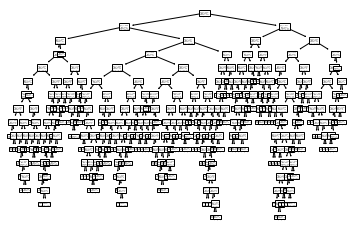

In [38]:
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

In [39]:
## Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth' : range(1, 20),
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : range(1,50)
}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param, refit = True)
grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 50),
                         'min_samples_split': [2, 3, 4]})

In [45]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 2}

In [52]:
param = {
    'max_depth' : range(5,10),
    'min_samples_split' : range(2,20),
    'min_samples_leaf' : range(30,50)
}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param, refit = True)
grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(30, 50),
                         'min_samples_split': range(2, 20)})

In [53]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 5}

In [54]:
y_pred = grid.best_estimator_.predict(x_test_scaled)

In [55]:
accuracy_score(y_test, y_pred)

0.728125

In [56]:
bdt = grid.best_estimator_ 

In [80]:
bdt.predict(x_test_scaled)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
##

In [61]:
for name, value in zip(df_x.columns, bdt.feature_importances_):
    print(name, value)

fixed acidity 0.0
volatile acidity 0.06556591272581637
citric acid 0.019688833250591235
residual sugar 0.0
chlorides 0.03457527133248845
free sulfur dioxide 0.0
total sulfur dioxide 0.11994023195400912
density 0.0
pH 0.0013639997888365435
sulphates 0.1877790613088178
alcohol 0.5710866896394404


In [69]:
sr = pd.Series(bdt.feature_importances_, index = df_x.columns)
sr

fixed acidity           0.000000
volatile acidity        0.065566
citric acid             0.019689
residual sugar          0.000000
chlorides               0.034575
free sulfur dioxide     0.000000
total sulfur dioxide    0.119940
density                 0.000000
pH                      0.001364
sulphates               0.187779
alcohol                 0.571087
dtype: float64

In [70]:
sr = sr.sort_values(ascending = False)
sr

alcohol                 0.571087
sulphates               0.187779
total sulfur dioxide    0.119940
volatile acidity        0.065566
chlorides               0.034575
citric acid             0.019689
pH                      0.001364
fixed acidity           0.000000
residual sugar          0.000000
free sulfur dioxide     0.000000
density                 0.000000
dtype: float64

<AxesSubplot:>

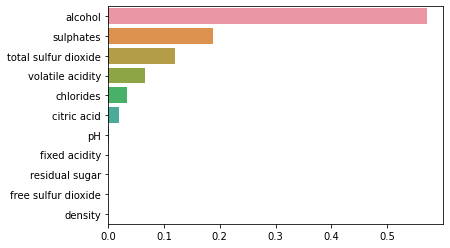

In [72]:
sns.barplot(x=sr, y=sr.index)

In [75]:
## 모델 파일화 저장
import pickle

pickle.dump(bdt, open('my_dt_wine.pkl', 'wb'), protocol = 4)

In [78]:
## 파일화 된 모델 로딩

my_dt = pickle.load(open('my_dt_wine.pkl', 'rb'))

In [79]:
my_dt.predict(x_test_scaled)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

# Random Forest

-----------------

In [81]:
x_train_scaled.shape, y_train.shape

((1279, 11), (1279,))

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [83]:
y_pred = rfc.predict(x_test_scaled)

In [84]:
accuracy_score(y_test, y_pred)

0.821875

In [89]:
pram = {
    'n_estimators' : range(50,200,10),
    'max_depth' : range(5,10),
    'min_samples_leaf' : range(2,5)
}

model = RandomForestClassifier()
grid = GridSearchCV(model, pram, refit = True)
grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(2, 5),
                         'n_estimators': range(50, 200, 10)})

In [ ]:
grid.best_params_